# Discription

"""This project involves predicting housing prices using a limited dataset with a unique challenge: strong multicollinearity among the predictor variables. The dataset includes various factors such as house area, number of bedrooms, furnished status, proximity to the main road, and potentially other relevant features. 
The goal is to build a robust predictive model despite the intricate relationships among these variables."""

# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\mandar joshi\OneDrive\Desktop\ds\ml\data sets\Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


"""There is no null value in that dataset so that we can directly go to the EDA part """

# Data Visualization

In [6]:
x=df.groupby(by='furnishingstatus').agg(price=('price','mean'),
                                       area=('area','mean'))
print(x)

                         price         area
furnishingstatus                           
furnished         5.495696e+06  5688.100000
semi-furnished    4.907524e+06  5166.339207
unfurnished       4.013831e+06  4707.595506


" Here'Groupby' gives us average value in  'price' and 'area' column according to each furniturestatus."

([<matplotlib.patches.Wedge at 0x25150975370>,
 [Text(0.4010972894030775, 1.0242660613500303, 'furnished'),
  Text(-1.0431475877811163, -0.34906032445186097, 'semi-furnished'),
  Text(0.7053946725000341, -0.8440487876945088, 'unfurnished')],
 [Text(0.21878033967440588, 0.5586905789181983, '38.12'),
  Text(-0.5689895933351543, -0.19039654061010597, '34.04'),
  Text(0.384760730454564, -0.46039024783336835, '27.84')])

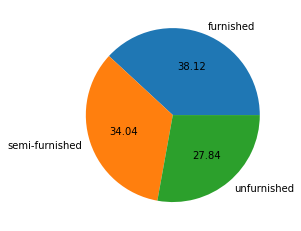

In [7]:
plt.pie(labels=x.index,x=x['price'].values,autopct='%0.2f')

"Here we can see that the price is distributed according to the furniture status, Higher to lower."

([<matplotlib.patches.Wedge at 0x25150a3e820>,
 [Text(0.45105474087555164, 1.0032694656639807, 'furnished'),
  Text(-1.078521177696528, -0.21631474582213397, 'semi-furnished'),
  Text(0.6395400634462858, -0.8949796127550174, 'unfurnished')],
 [Text(0.24602985865939178, 0.5472378903621712, '36.55'),
  Text(-0.5882842787435607, -0.1179898613575276, '33.20'),
  Text(0.348840034607065, -0.48817069786637307, '30.25')])

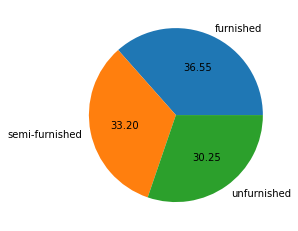

In [8]:
plt.pie(labels=x.index,x=x['area'].values,autopct='%0.2f')

<AxesSubplot:xlabel='mainroad', ylabel='price'>

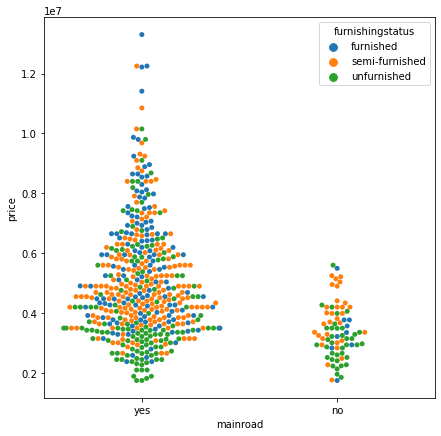

In [9]:
plt.figure(figsize=(7,7))
sns.swarmplot(x=df['mainroad'],y=df['price'],hue=df['furnishingstatus'])

"Here we can see that very less number of houses is there. They Don't have main road and mostly they are semi furnished."

<AxesSubplot:xlabel='mainroad', ylabel='area'>

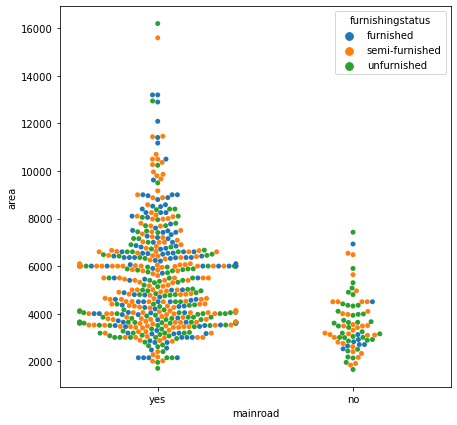

In [10]:
plt.figure(figsize=(7,7))
sns.swarmplot(x=df['mainroad'],y=df['area'],hue=df['furnishingstatus'])

"Here we see the same thing."

In [11]:
x=list(df.select_dtypes(include='object'))
print(x)
print(len(x))

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
7


In [12]:
"These all are the categorical columns."

'These all are the categorical columns.'

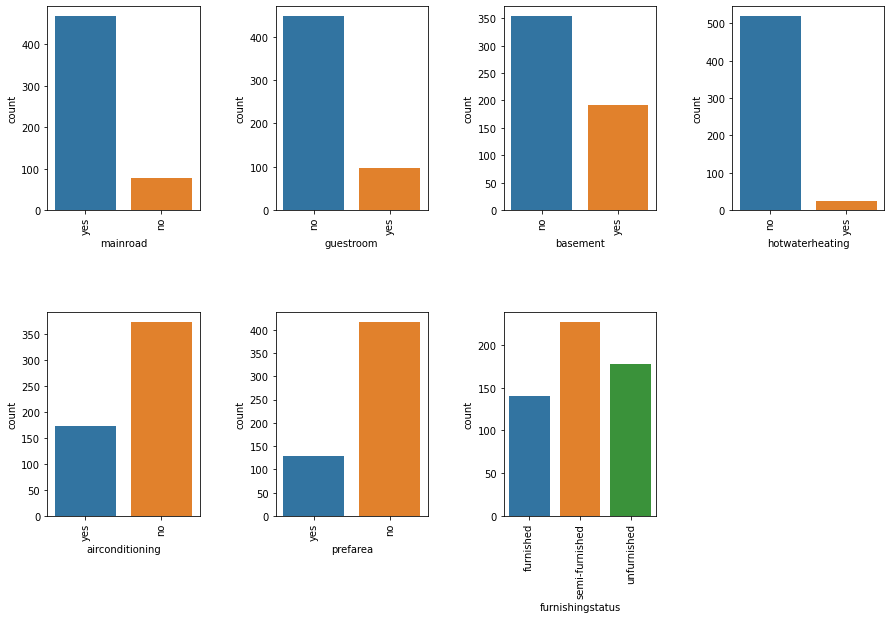

In [13]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

for i in range(len(x)):
    plt.subplot(3,4,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[x[i]])

"By applying the loop, here we plot all the categorical features in bar plot."

<function matplotlib.pyplot.show(close=None, block=None)>

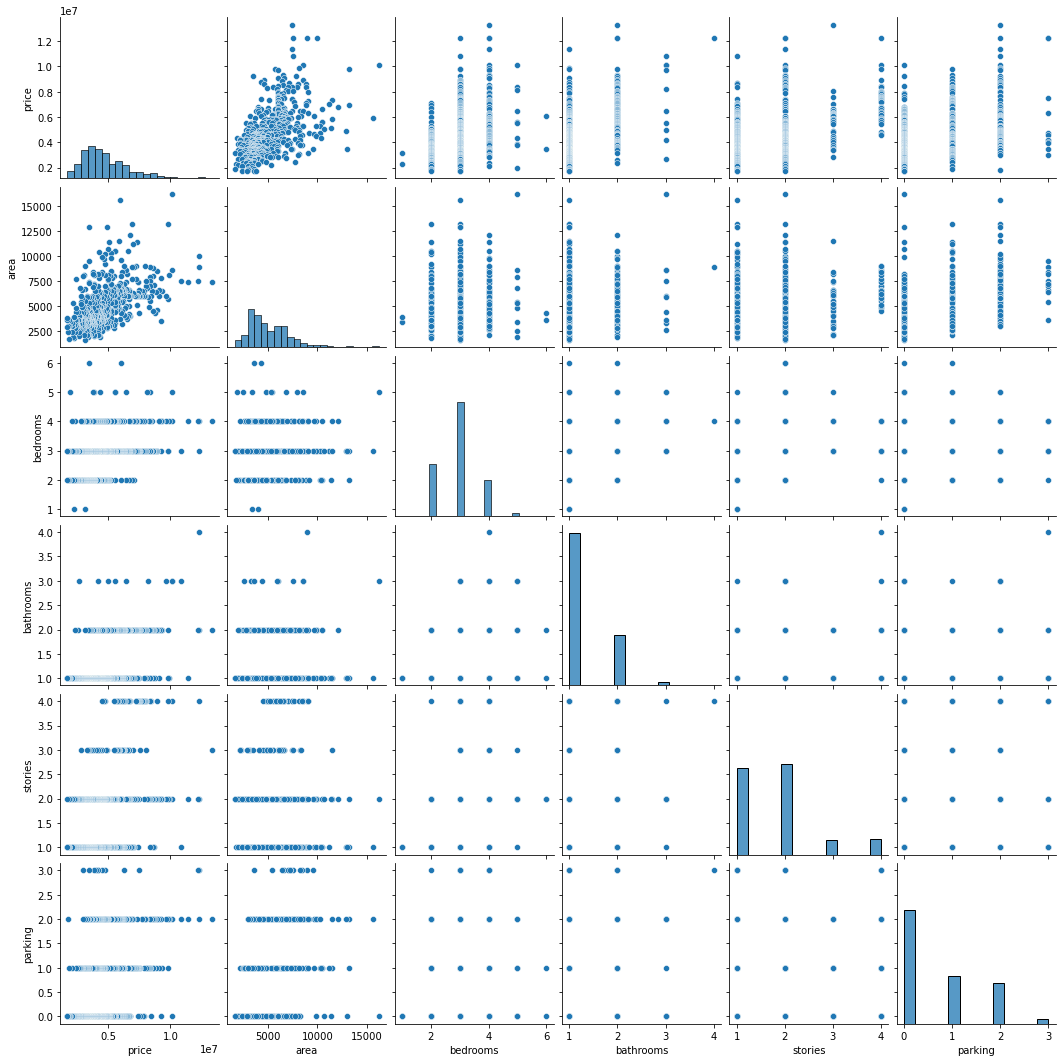

In [14]:
sns.pairplot(df)
plt.show

# Checking null values

In [15]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Outlier Treatment

"Here we are checking the outliers in our numerical columns with the help of box plot."

<AxesSubplot:>

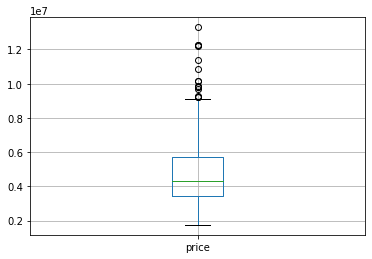

In [16]:
df.boxplot('price')

<AxesSubplot:>

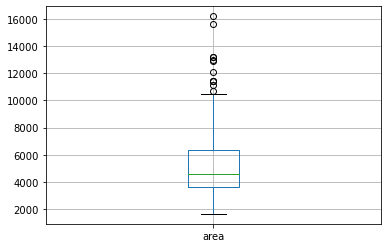

In [17]:
df.boxplot('area')

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Text(0.5, 1.0, 'Histogram of Area')

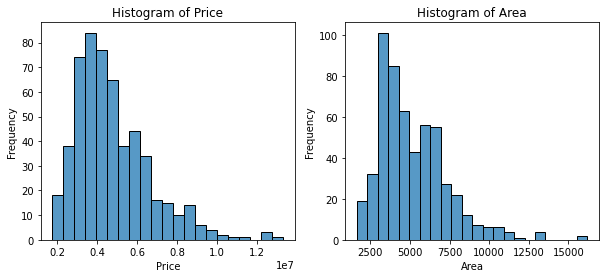

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['price'], ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Price')

sns.histplot(df['area'], ax=axes[1])
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Area')

"""Here with the help of histogram we can see that our data is not normally distributed. So that  we use 'IQR method' for treating the outliers. 
There is another method for 'Z score method'. But this method is used from when our data is normally distributed."""

In [20]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3 - q1
print(IQR)

2310000.0


In [21]:
q2_1 = df['area'].quantile(0.25)
q2_3 = df['area'].quantile(0.75)
IQR2 = q2_3 - q2_1 
print(IQR2)

2760.0


In [22]:
#price
higher_limit_allowed = q3 + 1.5 * IQR
#area
higher_limit_allowed2 = q2_3 + 1.5 * IQR2

In [23]:
higher_limit_allowed # for price

9205000.0

In [24]:
higher_limit_allowed2 #for area

10500.0

In [25]:
df[df['price'] > higher_limit_allowed]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [26]:
df[df['area'] > higher_limit_allowed2]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [27]:
cleaned_df = df.copy()

 "Here we are applying the capping method for treating the outlier in price and area column by setting the threshold value."

In [28]:
cleaned_df['price'] = np.where(cleaned_df['price'] > higher_limit_allowed, higher_limit_allowed, cleaned_df['price'])

In [29]:
cleaned_df['area'] = np.where(cleaned_df['area'] > higher_limit_allowed2, higher_limit_allowed2, cleaned_df['area'])

In [30]:
cleaned_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.727388e+06,5102.249541,2.965138,1.286239,1.805505,0.693578
std,1.745227e+06,2005.804353,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,9.205000e+06,10500.000000,6.000000,4.000000,4.000000,3.000000


Text(0.5, 1.0, 'Histogram of Area')

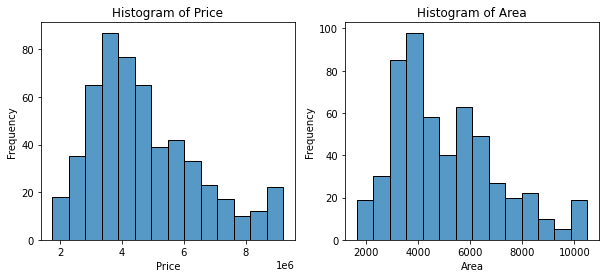

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(cleaned_df['price'], ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Price')

sns.histplot(cleaned_df['area'], ax=axes[1])
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Area')

In [32]:
"Now we can see that our data is normally distributed."

'Now we can see that our data is normally distributed.'

# Correlation Analysis

<AxesSubplot:>

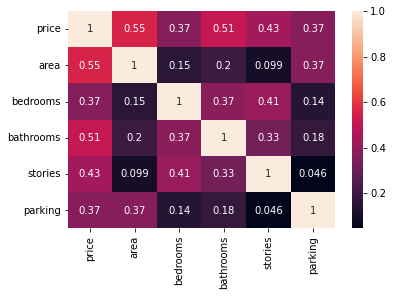

In [33]:
sns.heatmap(cleaned_df.corr(),annot=True)

In [34]:
cleaned_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [35]:
cols=[i for i in cleaned_df.columns if cleaned_df[i].dtypes==object]
cols.pop(-1)
cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

# Feature Engineering

In [36]:
cleaned_df = pd.get_dummies(cleaned_df,columns=cols)
cleaned_df.head(10)

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,9205000.0,7420.0,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,9205000.0,8960.0,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,9205000.0,9960.0,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,9205000.0,7500.0,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,9205000.0,7420.0,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0
5,9205000.0,7500.0,3,3,1,2,semi-furnished,0,1,1,0,0,1,1,0,0,1,0,1
6,9205000.0,8580.0,4,3,4,2,semi-furnished,0,1,1,0,1,0,1,0,0,1,0,1
7,9205000.0,10500.0,5,3,2,0,unfurnished,0,1,1,0,1,0,1,0,1,0,1,0
8,9205000.0,8100.0,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,0,1
9,9205000.0,5750.0,3,2,4,1,unfurnished,0,1,0,1,1,0,1,0,0,1,0,1


In [37]:
cleaned_df['furnishingstatus']=cleaned_df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'unfurnished':2})

In [38]:
x=cleaned_df.drop('price',axis=1)
y=cleaned_df['price'] 

In [39]:
x.head(2)

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,7420.0,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,8960.0,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0


In [40]:
y.head(2)

0    9205000.0
1    9205000.0
Name: price, dtype: float64

# Splitting the data

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

# Feature Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

"""Here we are scaling our data with the use  with the standard scalar. There is Another approach is the 'min Max scaler'
whenever data is Not normally distributed then We use the min Max scaler. Now our data is normally distributed, thats why we be used standard scaler."""

# Model Validation

"""Here we trying to use the multiple Algorithms we have to minimise the error and got a better R2 square,
That is the our first aim. """

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
x_train_pc = pca.fit_transform(x_train)
x_test_pc = pca.transform(x_test)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
from math import sqrt

In [46]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred_train = lm.predict(x_train)
q = r2_score(y_train,y_pred_train)

n = len(y_train)
k = x_train_pc.shape[1]

adj_r2 = 1-((1- r2_score(y_train,y_pred_train))*(n-1)/(n-k-1) )
rmse = sqrt(mean_squared_error(y_train,y_pred_train))

print('value of r2 is',{q})
print('value of adj_r2 is',{adj_r2})
print('value of rmse is',{rmse})

value of r2 is {0.6906186260954293}
value of adj_r2 is {0.6862916138729878}
value of rmse is {1006984.2436541971}


In [47]:
lm = LinearRegression()
lm.fit(x_test,y_test)
y_pred_test = lm.predict(x_test)
q = r2_score(y_test,y_pred_test)

n = len(y_test)
k = x_test_pc.shape[1]

adj_r2 = 1-((1- r2_score(y_test,y_pred_test))*(n-1)/(n-k-1) )
rmse = sqrt(mean_squared_error(y_test,y_pred_test))

print('value of r2 is',{q})
print('value of adj_r2 is',{adj_r2})
print('value of rmse is',{rmse})

value of r2 is {0.715287177788323}
value of adj_r2 is {0.6985393647170479}
value of rmse is {767684.8566541797}


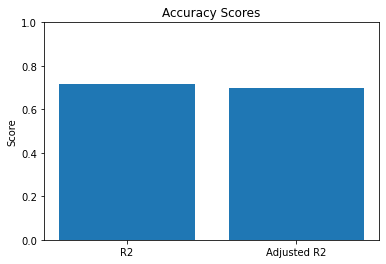

In [48]:
import matplotlib.pyplot as plt

# Assuming you have the R2 and adjusted R2 values stored in variables
r2_score = 0.715287177788323
adjusted_r2_score = 0.6985393647170479
# Plotting the R2 and adjusted R2 scores
labels = ['R2', 'Adjusted R2']
scores = [r2_score, adjusted_r2_score]

plt.bar(labels, scores)
plt.ylim(0, 1)  # Adjust the y-axis limits according to your score range
plt.title('Accuracy Scores')
plt.ylabel('Score')
plt.show()


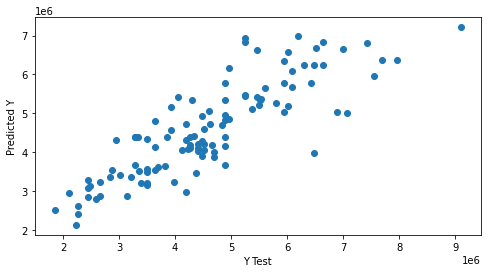

In [49]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

knn = KNeighborsRegressor(n_neighbors=15)

knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
r2_knn = r2_score(y_test, y_pred_knn)
rmse = sqrt(mean_squared_error(y_test, y_pred_knn))

print('Value of r2 is', r2_knn)
print('Value of rmse is', rmse)


Value of r2 is 0.6042566656532903
Value of rmse is 905078.5344681608


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

dt = DecisionTreeRegressor(max_depth=5, random_state=44, min_samples_split=12)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse = sqrt(mean_squared_error(y_test, y_pred_dt))

print('Value of r2 is', r2_dt)
print('Value of rmse is', rmse)


Value of r2 is 0.2553388358056259
Value of rmse is 1241534.559520355


In [63]:
from sklearn.svm import SVR

svm_1 = SVR(kernel ='poly') 
svm_1.fit(x_train, y_train)
y_pred_svm = svm_1.predict(x_test)
r2_svm_1 = r2_score(y_test, y_pred_svm)
rmse = sqrt(mean_squared_error(y_test, y_pred_svm))

print('Value of r2 is', r2_svm_1)
print('Value of rmse is', rmse)


Value of r2 is -0.05192174602001298
Value of rmse is 1475608.5986049338


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid={'gamma':[0.1,0.01,0.5,0.7,1], 'C':[0.1,1,10,20,15],
           'kernel':['rbf','sigmoid','linear']}
svr=SVR()
grid=GridSearchCV(svr,param_grid,cv=20)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 20, 'gamma': 0.1, 'kernel': 'linear'}

In [64]:
from sklearn.svm import SVR

svm = SVR(kernel ='linear',C = 20, gamma = 0.1)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
r2_svm = r2_score(y_test, y_pred_svm)
rmse = sqrt(mean_squared_error(y_test, y_pred_svm))

print('Value of r2 is', r2_svm)
print('Value of rmse is', rmse)

Value of r2 is -0.025041775553065193
Value of rmse is 1456633.3310226814


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

rt = RandomForestRegressor(max_depth=5, random_state=44, min_samples_split=12, n_estimators=30)
rt.fit(x_train, y_train)
y_pred_rt = rt.predict(x_test)
r2_rt = r2_score(y_test, y_pred_rt)
rmse = sqrt(mean_squared_error(y_test, y_pred_rt))

print('Value of r2 is', r2_rt)
print('Value of rmse is', rmse)


Value of r2 is 0.6375297533007839
Value of rmse is 866194.9398784834


# Conclusion

"""K-Nearest Neighbors (KNN) and Linear Regression emerged as the top-performing models, 
with KNN providing the highest accuracy. These models are recommended for pricing decisions.
Further optimization and feature engineering may enhance predictive capabilities. 
Stakeholders can confidently rely on these models to estimate house prices effectively."""

"""The linear regression model exhibits promising performance based on the provided accuracy metrics.
With a training R-squared of 0.6906 and testing R-squared of 0.7153, it effectively explains a substantial portion of 
the target variable's variance. Furthermore, the adjusted R-squared values of 0.6863 for training and 0.6985 for
testing suggest that the model incorporates relevant predictors without undue complexity. Additionally, 
the lower RMSE on the testing data (767,684.86) compared to training (1,006,984.24) indicates improved generalization 
capabilities. While these results are positive, further domain-specific analysis and fine-tuning may be considered 
to minimize prediction errors and optimize model performance."""

# Generalization

"""The model generalizes well to unseen data, indicating that it is not overly tailored to the training dataset. 
This means it can provide reliable price predictions for new or future properties."""

#                                     """Thank You for coming"""